In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from matplotlib.pyplot import figure
import mysql.connector

In [2]:
# Importing CSV file into DataFrame
chocolate = pd.read_csv("flavors_of_cacao.csv")
print(chocolate.head())

  Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                   A. Morin                       Agua Grande  1876   
1                   A. Morin                             Kpime  1676   
2                   A. Morin                            Atsane  1676   
3                   A. Morin                             Akata  1680   
4                   A. Morin                            Quilla  1704   

   Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0          2016            63%            France    3.75              
1          2015            70%            France    2.75              
2          2015            70%            France    3.00              
3          2015            70%            France    3.50              
4          2015            70%            France    3.50              

  Broad Bean\nOrigin  
0           Sao Tome  
1               Togo  
2               Togo  
3               Togo  
4               Peru  


In [3]:
# Understanding the shape of the DataFrame
chocolate.shape

(1795, 9)

In [4]:
# Cleaning the data
# Explore types of data in DataFrame
print(chocolate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB
None


In [5]:
# Cleaning the data
# Renaming columns
chocolate.columns = ["Company", "Specific Bean Origin/Bar Name", "REF", "Review Date", "Cocoa Percentage", "Location", "Rating", "Bean Type", "Broad Bean Origin"]
chocolate.head(10)

,Company,Specific Bean Origin/Bar Name,REF,Review Date,Cocoa Percentage,Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [6]:
# Change format of Cocoa Percentage column to float
chocolate["Cocoa Percentage"] = chocolate["Cocoa Percentage"].str.replace("%","")
chocolate["Cocoa Percentage"] = chocolate["Cocoa Percentage"].astype(float)
chocolate.head()

,Company,Specific Bean Origin/Bar Name,REF,Review Date,Cocoa Percentage,Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [7]:
# Dropping duplicates
chocolate = chocolate.drop_duplicates()
chocolate.shape

(1795, 9)

In [8]:
# Checking for missing data
chocolate.isna().sum()

Company                          0
Specific Bean Origin/Bar Name    0
REF                              0
Review Date                      0
Cocoa Percentage                 0
Location                         0
Rating                           0
Bean Type                        1
Broad Bean Origin                1
dtype: int64

In [9]:
# Looks like there is minimal missing data. According to the above, there is 1 missing values in both the Bean Type column and the Broad Bean Origin Frame column. 
# Print out topline information (head) of both columns to explore this further. 
chocolate[['Bean Type', 'Broad Bean Origin']].head(10)

,Bean Type,Broad Bean Origin
0,,Sao Tome
1,,Togo
2,,Togo
3,,Togo
4,,Peru
5,Criollo,Venezuela
6,,Cuba
7,Criollo,Venezuela
8,Criollo,Venezuela
9,,Peru


In [10]:
# Clearly there is more than just 1 missing value in Bean Type
# Work out how many values are actually missing
chocolate['Bean Type'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Nacional (Arriba)             3
Beniano                       3
Matina                        3
Nacional                      2
Amazon mix                    2
Criollo (Amarru)              2
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Amazon, ICS                   2
Forastero (Catongo)           2
Criollo, Forastero            2
Trinitario (85% Criollo)      2
Criollo (Wild)                1
Blend-Forastero,Criollo       1
Criollo (Ocumare 67)          1
CCN51                         1
Trinitario (Amelonado)        1
Forastero(Arriba, CCN)        1
Trinitar

In [11]:
# According to the above there are 887 missing or blank values in the Bean Type column. 
# Get an understanding blanks in 'Bean Type' column
list(chocolate["Bean Type"][0:10])

['\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 'Criollo',
 '\xa0',
 'Criollo',
 'Criollo',
 '\xa0']

In [12]:
# Replace missing data
chocolate["Bean Type"] = chocolate["Bean Type"].str.replace("\xa0", "Unknown")
chocolate

,Company,Specific Bean Origin/Bar Name,REF,Review Date,Cocoa Percentage,Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,Unknown,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,Unknown,India


In [13]:
# Recheck data to get an understanding blanks now in 'Bean Type' column 
list(chocolate["Bean Type"][0:10])

['Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Criollo',
 'Unknown',
 'Criollo',
 'Criollo',
 'Unknown']

In [14]:
# Clearly there is more than just 1 missing value in Bean Type
# Work out how many values are actually missing
chocolate['Bean Type'].value_counts()

Unknown                     887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Matina                        3
EET                           3
Nacional (Arriba)             3
Beniano                       3
Forastero (Catongo)           2
Amazon mix                    2
Criollo (Amarru)              2
Criollo (Ocumare 61)          2
Amazon, ICS                   2
Nacional                      2
Trinitario (85% Criollo)      2
Criollo, Forastero            2
Trinitario, Forastero         2
Blend-Forastero,Criollo       1
Criollo (Wild)                1
CCN51                         1
Trinitario (Amelonado)        1
Forastero(Arriba, CCN)        1
Trinitario, Nacional          1
Criollo,

In [15]:
# Getting percentage of Bean Type values that are Unknown 
# Create a function to achieve this 
# Unknown values in Bean Type = 887

def missing_perc (x): 
    missing = ((x / chocolate.shape[0]))
    missing_perc = "{:.0%}".format(missing)
    return missing_perc

print(missing_perc(887))

49%


In [16]:
# Remove 'Bean Type' column due to high percentage of missing data
chocolate = chocolate.drop(["Bean Type"], axis=1)
chocolate

,Company,Specific Bean Origin/Bar Name,REF,Review Date,Cocoa Percentage,Location,Rating,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,India


In [17]:
# Taking a look at the Locations... 

# How many unique Company Locations are there, and what are they? 
chocolate["Location"].nunique()
print(chocolate["Location"].unique())

['France' 'U.S.A.' 'Fiji' 'Ecuador' 'Mexico' 'Switzerland' 'Netherlands'
 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'U.K.' 'Australia' 'Wales'
 'Belgium' 'Germany' 'Russia' 'Puerto Rico' 'Venezuela' 'Colombia' 'Japan'
 'New Zealand' 'Costa Rica' 'South Korea' 'Amsterdam' 'Scotland'
 'Martinique' 'Sao Tome' 'Argentina' 'Guatemala' 'South Africa' 'Bolivia'
 'St. Lucia' 'Portugal' 'Singapore' 'Denmark' 'Vietnam' 'Grenada' 'Israel'
 'India' 'Czech Republic' 'Domincan Republic' 'Finland' 'Madagascar'
 'Philippines' 'Sweden' 'Poland' 'Austria' 'Honduras' 'Nicaragua'
 'Lithuania' 'Niacragua' 'Chile' 'Ghana' 'Iceland' 'Eucador' 'Hungary'
 'Suriname' 'Ireland']


In [18]:
# Are all values on the above list the same type of information (i.e. Country)? 
# Can see Amsterdam listed as Location - change this to Netherlands, for consistency of Country. 
chocolate = chocolate.replace("Amsterdam", "Netherlands")
chocolate = chocolate.replace("Niacragua", "Nicaragua")
chocolate = chocolate.replace("Domincan Republic", "Dominican Republic")
chocolate = chocolate.replace("Sao Tome", "Sao Tome and Principe")
chocolate = chocolate.replace("Eucador", "Ecuador")

# Check to see if unqiue number has reduced due to above changes?
chocolate["Location"].nunique()

57

In [19]:
# Rename Location column to Country 
chocolate.rename(columns={"Location":"Country"}, inplace=True)
print(chocolate.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company                        1795 non-null   object 
 1   Specific Bean Origin/Bar Name  1795 non-null   object 
 2   REF                            1795 non-null   int64  
 3   Review Date                    1795 non-null   int64  
 4   Cocoa Percentage               1795 non-null   float64
 5   Country                        1795 non-null   object 
 6   Rating                         1795 non-null   float64
 7   Broad Bean Origin              1794 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 126.2+ KB
None


In [20]:
# What is the updated list of unique Country names?
print(chocolate["Country"].unique())

['France' 'U.S.A.' 'Fiji' 'Ecuador' 'Mexico' 'Switzerland' 'Netherlands'
 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'U.K.' 'Australia' 'Wales'
 'Belgium' 'Germany' 'Russia' 'Puerto Rico' 'Venezuela' 'Colombia' 'Japan'
 'New Zealand' 'Costa Rica' 'South Korea' 'Scotland' 'Martinique'
 'Sao Tome and Principe' 'Argentina' 'Guatemala' 'South Africa' 'Bolivia'
 'St. Lucia' 'Portugal' 'Singapore' 'Denmark' 'Vietnam' 'Grenada' 'Israel'
 'India' 'Czech Republic' 'Dominican Republic' 'Finland' 'Madagascar'
 'Philippines' 'Sweden' 'Poland' 'Austria' 'Honduras' 'Nicaragua'
 'Lithuania' 'Chile' 'Ghana' 'Iceland' 'Hungary' 'Suriname' 'Ireland']


In [21]:
# Which Country has the most Ratings? 
country_counts = chocolate["Country"].value_counts()
print(country_counts)

U.S.A.                   764
France                   156
Canada                   125
U.K.                      96
Italy                     63
Ecuador                   55
Australia                 49
Belgium                   40
Switzerland               38
Germany                   35
Austria                   26
Spain                     25
Colombia                  23
Hungary                   22
Venezuela                 20
Peru                      17
New Zealand               17
Brazil                    17
Madagascar                17
Japan                     17
Denmark                   15
Vietnam                   11
Guatemala                 10
Scotland                  10
Argentina                  9
Israel                     9
Costa Rica                 9
Poland                     8
Netherlands                8
Honduras                   6
Lithuania                  6
Nicaragua                  6
Sweden                     5
Dominican Republic         5
South Korea   

In [22]:
# Create DataFrame based on the above 

df_country_counts = pd.DataFrame(country_counts)
df_country_counts = country_counts.reset_index()
df_country_counts.columns = ["Country", "No. of Ratings"]
df_country_counts


,Country,No. of Ratings
0,U.S.A.,764
1,France,156
2,Canada,125
3,U.K.,96
4,Italy,63
5,Ecuador,55
6,Australia,49
7,Belgium,40
8,Switzerland,38
9,Germany,35


In [23]:
# Importing using MySQL WorkBench
# Create connection 
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mySQlsErVerJul21!UCD",
    database='sys')

In [24]:
# Run SQL query 
mycursor = mydb.cursor()
mycursor

In [25]:
# Executing SQL query
mycursor.execute("Select * from UCDDB.country_populations")

In [26]:
# Fetching results from Cursor object
myresults = mycursor.fetchall()
myresults[0]

('Aruba', 'ABW', 106766)

In [27]:
# Get type of results
type(myresults)

list

In [28]:
# Save list as DataFrame
country_population = []
for x in myresults:   
    country_population.append(list(x)) 
country_population = pd.DataFrame(country_population) 
country_population.head()

,0,1,2
0,Aruba,ABW,106766
1,Africa Eastern and Southern,AFE,677243299
2,Afghanistan,AFG,38928341
3,Africa Western and Central,AFW,458803476
4,Angola,AGO,32866268


In [29]:
# Pull in the Column Names via SQL
mycursor.execute("Select * from INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'country_populations' ")
myresults = mycursor.fetchall()
for x in myresults:
    print(x)

('def', 'UCDDB', 'country_populations', 'Country Code', 2, None, 'YES', 'text', 65535, 65535, None, None, None, 'utf8mb4', 'utf8mb4_0900_ai_ci', b'text', '', '', 'select,insert,update,references', '', '', None)
('def', 'UCDDB', 'country_populations', 'Country Name', 1, None, 'YES', 'text', 65535, 65535, None, None, None, 'utf8mb4', 'utf8mb4_0900_ai_ci', b'text', '', '', 'select,insert,update,references', '', '', None)
('def', 'UCDDB', 'country_populations', 'Population', 3, None, 'YES', 'int', None, None, 10, 0, None, None, None, b'int', '', '', 'select,insert,update,references', '', '', None)


In [30]:
# Get Column Names 
columns = []
for x in myresults:
    columns.append(x[3])
columns

['Country Code', 'Country Name', 'Population']

In [31]:
# Add column names to DataFrame
country_population.columns = ["Country", "Country Name", "Population"]
country_population.head()

,Country,Country Name,Population
0,Aruba,ABW,106766
1,Africa Eastern and Southern,AFE,677243299
2,Afghanistan,AFG,38928341
3,Africa Western and Central,AFW,458803476
4,Angola,AGO,32866268


In [32]:
# Cleaning the new data
# Drop duplicates 
country_population = country_population.drop_duplicates()
country_population.shape

# Checking for Nulls 
country_population.isna().any()

Country         False
Country Name    False
Population      False
dtype: bool

In [33]:
# Merging the data 
country_counts_pop_merged = df_country_counts.merge(country_population, left_on="Country", right_on="Country", how="left")
country_counts_pop_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         57 non-null     object 
 1   No. of Ratings  57 non-null     int64  
 2   Country Name    54 non-null     object 
 3   Population      54 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ KB


In [34]:
country_counts_pop_merged.head()

,Country,No. of Ratings,Country Name,Population
0,U.S.A.,764,USA,329484123.0
1,France,156,FRA,67391582.0
2,Canada,125,CAN,38005238.0
3,U.K.,96,GBR,67215293.0
4,Italy,63,ITA,59554023.0


In [35]:
# Reviewing which Country has the most Ratings per Capita?
# Add column which showcases Ratings per Capita

country_counts_pop_merged["Ratings per 1,000"] = (country_counts_pop_merged["No. of Ratings"] / country_counts_pop_merged["Population"]* 1000)
country_counts_pop_merged

# Sort values in Ratings by 1,000 to understand which Country ranks first
country_counts_pop_merged.sort_values("Ratings per 1,000", ascending=False)

,Country,No. of Ratings,Country Name,Population,"Ratings per 1,000"
43,Grenada,3,GRD,1.125190e+05,2.666216e-02
36,Sao Tome and Principe,4,STP,2.191610e+05,1.825142e-02
45,St. Lucia,2,LCA,1.836290e+05,1.089153e-02
44,Iceland,3,ISL,3.664250e+05,8.187214e-03
35,Fiji,4,FJI,8.964440e+05,4.462075e-03
8,Switzerland,38,CHE,8.636896e+06,4.399729e-03
7,Belgium,40,BEL,1.155600e+07,3.461406e-03
16,New Zealand,17,NZL,5.084300e+06,3.343626e-03
2,Canada,125,CAN,3.800524e+07,3.289020e-03
5,Ecuador,55,ECU,1.764306e+07,3.117373e-03


In [36]:
# The Country that has the most Chocolate Rankings per 1,000 is Grenada. 

In [37]:
# Now to look at others parts of the data in detail: 

# Firstly, looking at the Companies who appear the most: 
freq_companies = chocolate['Company'].value_counts().head(10)
freq_companies

Soma                          47
Bonnat                        27
Fresco                        26
Pralus                        25
A. Morin                      23
Guittard                      22
Domori                        22
Arete                         22
Valrhona                      21
Hotel Chocolat (Coppeneur)    19
Name: Company, dtype: int64

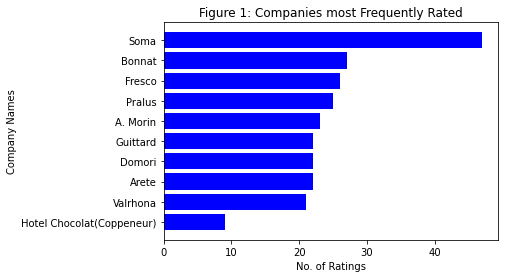

<Figure size 720x504 with 0 Axes>

In [38]:
# Create dictionary of Companies most frequently rated: 
data = {"Soma":47, "Bonnat":27, "Fresco":26, "Pralus":25, "A. Morin": 23, "Guittard":22, "Domori":22, "Arete":22,
"Valrhona":21, "Hotel Chocolat(Coppeneur)":9}
companies = list(data.keys())
chocolate_ratings = list(data.values()) 

# Create a chart to showcase Companies most frequently rated: 
fig, ax = plt.subplots()
fig = plt.figure(figsize=(10,7))
ax.barh(companies, chocolate_ratings, color="b")
ax.set_xlabel("No. of Ratings")
ax.set_ylabel("Company Names")
ax.invert_yaxis()
ax.set_title("Figure 1: Companies most Frequently Rated")
fig.savefig("Figure 1: Companies Freq. Rated.png", format="png", dpi=1200)
plt.show()

# Visualisation 1

In [39]:
# But which companies have the best chocolate? Explore rows that have the highest Rating = 5
chocolate.loc[chocolate["Rating"] == chocolate["Rating"].max()]

,Company,Specific Bean Origin/Bar Name,REF,Review Date,Cocoa Percentage,Country,Rating,Broad Bean Origin
78,Amedei,Chuao,111,2007,70.0,Italy,5.0,Venezuela
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.0,


In [40]:
# Above we can see that Amedei has the highest rated chocolate, but they aren't within the Top 10 most frequently rated Companies... 
# It is worth exploring whether there a correlation between the Companies that have the highest Average Rating across their chocolate, and the number of items that have been rated for that Company? 
ratings_company = chocolate.groupby("Company")[["Rating"]].mean(). sort_values(by="Rating", ascending=False)
ratings_company = ratings_company.head(11)
ratings_company

,Rating
Company,
Tobago Estate (Pralus),4.000000
Heirloom Cacao Preservation (Zokoko),3.875000
Ocelot,3.875000
Amedei,3.846154
Matale,3.812500
Patric,3.791667
Idilio (Felchlin),3.775000
Obolo,3.750000
Un Dimanche A Paris,3.750000


In [43]:
# Looking at these, it is clear that out of the Top 10 most frequently rated Companies (Fig 1), there is little to no correlation to the best performing companies in terms of ratings.  

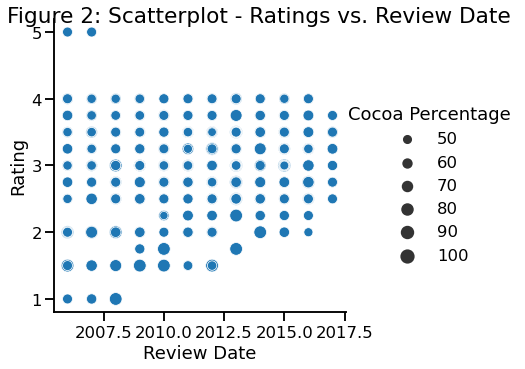

In [41]:
# Another way to look at the data is by the year of the Rating, to get an understanding of how Ratings have changed over time
# Create scatter plot to look at Review Date vs. Rating

# Visualisation 2
sns.set_context("talk")
g = sns.relplot(x="Review Date", y="Rating", data=chocolate, kind="scatter", size = "Cocoa Percentage")
g.fig.suptitle("Figure 2: Scatterplot - Ratings vs. Review Date")
fig.savefig("Figure 2: Scatterplot - Ratings vs. Review Date.png", format="png", dpi=1200)

In [42]:
# What can be seen from the above is that the number of higher ratings (>= 4) were higher circa. 2006, than they have been in more recent years (2016 and 2017)

In [44]:
# Looking at the Ratings again in... 
# When it comes to the lower Ratings, how many times is chocolate rated 1.5 or less over the course of the data? Looking at this using a for loop

count = 0 
for ratings in chocolate["Rating"]: 
        if (ratings <= 1.5): 
            count += 1
print("The number of times that a chocolate bar has been ranked 1.5 or lower is", count)

The number of times that a chocolate bar has been ranked 1.5 or lower is 14


In [45]:
# When it comes to the higher ratings, is there a correlation between this and what Cocoa Percentage the chocolate has?
# Firstly, get the average Cocoa Percentage over the years
cocoa_time = chocolate.groupby("Review Date").mean()
cocoa_time

,REF,Cocoa Percentage,Rating
Review Date,,,
2006,54.375000,71.000000,3.125000
2007,151.155844,72.038961,3.162338
2008,256.086022,72.698925,2.994624
2009,389.585366,70.443089,3.073171
2010,540.306306,70.779279,3.148649
2011,703.787879,70.969697,3.256061
2012,900.692308,71.528205,3.178205
2013,1101.152174,72.266304,3.197011
2014,1319.165992,72.253036,3.189271


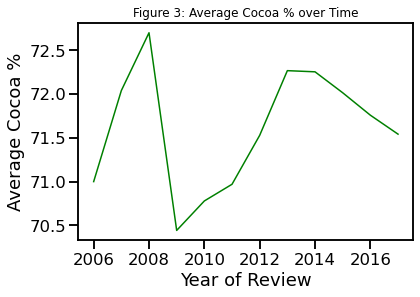

In [46]:
# Visualisation 3
# Create graph to review Average Cocoa % over Time
fig, ax = plt.subplots()
sns.set_context("notebook")
sns.lineplot(x="Review Date", y="Cocoa Percentage", data=cocoa_time, color="green")
plt.xlabel("Year of Review")
plt.ylabel("Average Cocoa %")
plt.title("Figure 3: Average Cocoa % over Time")
fig.savefig("Figure 3: Average Cocoa % over Time.png", format="png", dpi=1200)
plt.show()

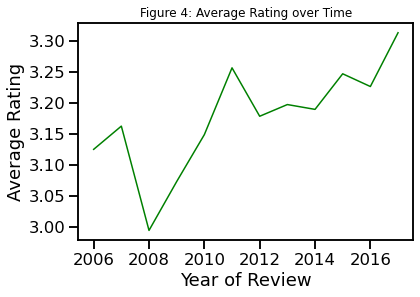

In [50]:
# Visualisation 4
# Create graph to review Average Rating over Time
fig, ax = plt.subplots()
sns.set_context("notebook")
sns.lineplot(x="Review Date", y="Rating", data=cocoa_time, color="green")
plt.xlabel("Year of Review")
plt.ylabel("Average Rating")
plt.title("Figure 4: Average Rating over Time")
fig.savefig("Figure 4: Average Rating over Time.png", format="png", dpi=1200)
plt.show()

In [51]:
# By looking at both Figure 3 and Figure 4 above, we can see that the Average Rating of chocolate has increase in recent years, whereas the Average Cocoa Percentrage seems to have tapered off. What is interesting is taht in around 2008-2009 there was a significant decline in both the Average Cocoa Percentage and the Average Ratings. This would make you consider whether there was a distinct correlation with these, whereby consumers were not as interested or appreciative of the chocolate with lower Cocoa Percentages. 

In [52]:
# Finally looking at Bean Origin, to understand if that impacts the Ratings being given to the chocolate... 

bean_origin_ratings = chocolate[["Broad Bean Origin", "Rating"]].copy()
bean_origin_ratings = bean_origin_ratings.sort_values(by=["Rating"], ascending = False)
top_bean_origin_ratings = bean_origin_ratings.head(21)
top_bean_origin_ratings.reset_index(drop=True, inplace=True)
top_bean_origin_ratings

,Broad Bean Origin,Rating
0,Venezuela,5.0
1,,5.0
2,Brazil,4.0
3,Venezuela,4.0
4,Tobago,4.0
5,Ecuador,4.0
6,Indonesia,4.0
7,"Ven, Bolivia, D.R.",4.0
8,Peru,4.0
9,Bolivia,4.0


In [53]:
# Can see missing data in Broad Bean Origin - is this all that's missing? 
bean_origin_ratings['Broad Bean Origin'].value_counts()

Venezuela                       214
Ecuador                         193
Dominican Republic              166
Peru                            165
Madagascar                      145
                               ... 
Ven, Bolivia, D.R.                1
Peru, Madagascar                  1
Venezuela/ Ghana                  1
Venez,Africa,Brasil,Peru,Mex      1
Venezuela, Java                   1
Name: Broad Bean Origin, Length: 99, dtype: int64

In [54]:
# Not as many missing, compared to Bean Type seen earlier. As such, will just rows in Top 20 that have missing values in cells 
top_20_origin_ratings = top_bean_origin_ratings.drop(labels=[1], axis=0,inplace=False)
top_20_origin_ratings.reset_index(drop=True, inplace=True)
top_20_origin_ratings

,Broad Bean Origin,Rating
0,Venezuela,5.0
1,Brazil,4.0
2,Venezuela,4.0
3,Tobago,4.0
4,Ecuador,4.0
5,Indonesia,4.0
6,"Ven, Bolivia, D.R.",4.0
7,Peru,4.0
8,Bolivia,4.0
9,Costa Rica,4.0


In [55]:
# Top 20 grouped by Bean Origin 
top_20_group = top_20_origin_ratings["Broad Bean Origin"].value_counts()
top_20_group 

Venezuela                      4
Ecuador                        3
Madagascar                     2
Peru                           2
Dom. Rep., Madagascar          1
Brazil                         1
Tobago                         1
Indonesia                      1
Ven, Bolivia, D.R.             1
Bolivia                        1
Gre., PNG, Haw., Haiti, Mad    1
Ghana                          1
Costa Rica                     1
Name: Broad Bean Origin, dtype: int64

In [56]:
# Create DataFrame based on the above 

df_top_20_group = pd.DataFrame(top_20_group)
df_top_20_group = top_20_group.reset_index()
df_top_20_group.columns = ["Country", "No. Times in Top 20"]
df_top_20_group

,Country,No. Times in Top 20
0,Venezuela,4
1,Ecuador,3
2,Madagascar,2
3,Peru,2
4,"Dom. Rep., Madagascar",1
5,Brazil,1
6,Tobago,1
7,Indonesia,1
8,"Ven, Bolivia, D.R.",1
9,Bolivia,1


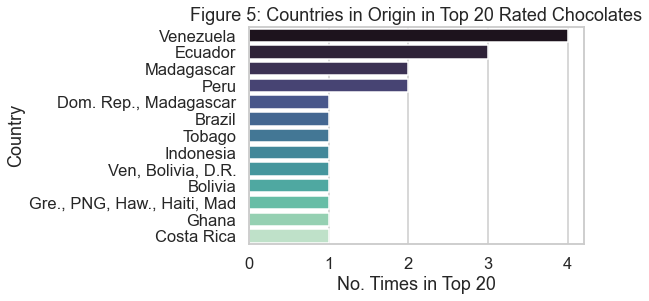

In [57]:
# Visualisation 5
# Create histogram showcasing the above data
sns.set_style('whitegrid')
sns.set_context("talk")
sns.barplot(data=df_top_20_group, x= "No. Times in Top 20", y= "Country", palette="mako").set_title ("Figure 5: Countries in Origin in Top 20 Rated Chocolates")
fig.savefig("Figure 5: Countries in Origin in Top 20 Rated Chocolates.png", format="png", dpi=1200)

In [58]:
# From the above chart the top performs for Country of Origin for Beans are Venezuela, Ecuador, Peru and Madagascar. What is interesting with this is that they are all in thr Southern Hemisphere, as are most other countries on the full list. Is that because of temperatures and the capability to grow cocoa in countries in the Northern Hemisphere, or is it due to pricing reasons? 